# Inner Product Example

We will find the optimal approximation, $\hat{f}(t)$, of a function $f(t)$ using the set of functions F, with coefficients C. It will be optimal in terms of the integral of the absolute value of the error squared.

$\DeclareMathOperator*{\argmax}{argmax}$

F is a vector of functions.

$F \triangleq \left[ f_0(t),\ f_1(t),\ f_2(t), \ldots \right]^T$

C is a vector of complex coefficients.

$C \triangleq \left[ c_0, c_1, c_2, \ldots, c_{\nu - 1}\right]^T, \ c_i \in \mathbb{C},\ C \in \mathbb{C}^{\nu}$

$\hat{f}(t)$ is the approximation of $f$.

$\hat{f}(t) \triangleq C^TF$

$C^*$ is the optimal coefficients of the approximating function.

$C^* = \argmax\limits_{C \in \mathbb{C}^{\nu}} \int_0^\tau |f(t)- C^TF|^2 dt$

In [1]:
import sympy
sympy.init_printing()
import matplotlib.pyplot as plt
import numpy as np

In [1]:
class L2:
    """
    Defines an inner product space, Lebesgue space, for functions
    whose 2nd-power of the absolute value is Lebesque integrable.
    
    L2 is the only Hilbert space among Lebesgue spaces.
    Hilbert space have the concept of angle and distance and are complete
    so that the stadard notions of calculus can be applied.
    
    https://en.wikipedia.org/wiki/Lp_space
    """
    
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def inner_product(self, f, g):
        t = sympy.symbols('t', real=True)
        a = self.a
        b = self.b
        return sympy.integrate(f*sympy.conjugate(g), (t, a, b))/(b - a)
    
    def norm(self, f):
        return sympy.sqrt(self.inner_product(f, f))
    
    def distance(self, f, g):
        return self.norm(f - g)

    def compute_G(self, F):
        return sympy.Matrix([
            [self.inner_product(F[i], F[j])
            for i in range(len(F))]
            for j in range(len(F))
        ])

In [3]:
l2_space = L2(0, 2*sympy.pi)
t = sympy.symbols('t', real=True)
l2_space.inner_product(1, t)

In [8]:
from sympy import *

In [12]:
l2_space = L2(0, 2*sympy.pi)
l2_space.inner_product(sympy.cos(t), sympy.cos(t))

In [11]:
l2_space.inner_product(sympy.sin(t), sympy.sin(t)).simplify()

In [13]:
def project(S, G, F, f):
    """
    Computes the optimal projection of f, onto the Lebesgue space, S, spanned by the function in F,
    with a Grahm matrix G.
    
    see: https://engineering.purdue.edu/AAECourses/aae567/2016/probability.pdf
    for details on the math, Theorem 4.3.2
    pg. 129
    """
    X = sympy.Matrix([[S.inner_product(F[i], f) for i in range(len(F))]])
    C = sympy.N(X*G.inv())
    f_approx = (C*F.T)[0]
    return f_approx

In [15]:
def plotting(f, f_approx, t0, tf):
    t_eval = np.linspace(t0, tf)
    
    def sym_eval(f, t_eval):
        return sympy.lambdify((t), (sympy.N(f)))(t_eval)
 
    plt.figure()
    plt.title('approximation')
    plt.plot(sym_eval(f_approx, t_eval))
    plt.plot(sym_eval(f, t_eval), 'o', alpha=0.5)
    plt.grid()
    
    plt.figure()
    plt.title('error')
    plt.plot(sym_eval(f - f_approx, t_eval))
    plt.grid()

# Our Function to Approximate

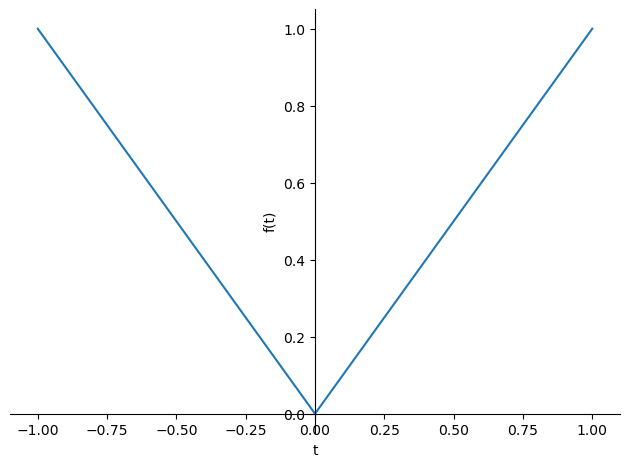

In [42]:
t = sympy.symbols('t', real=True)
f = sympy.Piecewise(
    (t, t < sympy.pi),
    (2*sympy.pi-t, t >= sympy.pi )
)
f = sympy.Abs(t)
sympy.plot(f, (t, -1, 1))

# The Optimal Approximation of f by the functions in F

In [56]:
# define our Lebesgue space, L2(0,1)
def compute_approx(f, F):
    Space = L2(-1, 1)
    G = sympy.N(Space.compute_G(F))
    return project(Space, G, F, f), G

def get_approx():
    t = sympy.symbols('t', real=True)
    F = sympy.Matrix([
        1.0,
        sympy.sin(t),
        sympy.cos(t),
        sympy.sin(2*t),
        sympy.cos(2*t),
        sympy.sin(3*t),
        sympy.cos(3*t),
        sympy.sin(5*t),
        sympy.cos(5*t)
    ]).T
    f_approx, G = compute_approx(f, F)
    return f_approx, G

In [57]:
f_approx, G = get_approx()
f_approx

In [58]:
G

⎡       1.0                   0           0.841470984807897           0       
⎢                                                                             
⎢        0            0.27267564329358            0           0.39721549106063
⎢                                                                             
⎢0.841470984807897            0            0.72732435670642           0       
⎢                                                                             
⎢        0            0.397215491060637           0           0.59460031191349
⎢                                                                             
⎢0.454648713412841            0           0.444255493747259           0       
⎢                                                                             
⎢        0            0.321924668619911           0           0.51662791987026
⎢                                                                             
⎢0.0470400026866224           0           0.13272404

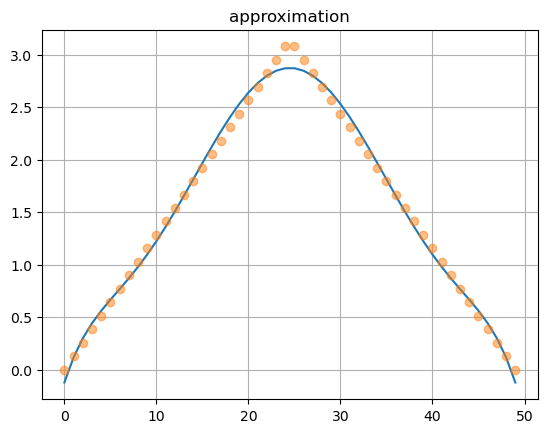

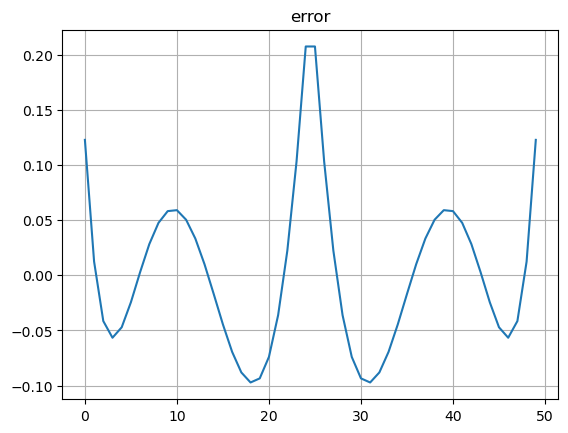

In [39]:
plotting(f, f_approx, 0.0, float(2*sympy.pi))